In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Used Car Dataset.csv')
df.head(10)

,Unnamed: 0,Brand,Model,Variant,Manufacturing Year,Driven Kilometers,Fuel,Location,Price
0,0,Maruti,Swift Dzire,VDI BS IV,2013,"74,644 km",Diesel,New Delhi,"4,01,999"
1,1,Maruti,Alto K10,LXI,2016,"32,669 km",Petrol,New Delhi,"3,05,199"
2,2,Maruti,Alto 800,LXI,2018,"29,031 km",Petrol,New Delhi,"2,95,599"
3,3,Maruti,Swift,VDI ABS,2015,"89,196 km",Diesel,New Delhi,"4,29,099"
4,4,Maruti,Ritz,VDI,2014,"43,382 km",Diesel,New Delhi,"3,44,199"
5,5,Maruti,Swift,VDI,2013,"1,14,506 km",Diesel,New Delhi,"3,41,599"
6,6,Maruti,Swift,VDI,2013,"29,449 km",Diesel,New Delhi,"3,61,199"
7,7,Hyundai,i 2 0,SPORTZ 1.4 CRDI,2013,"64,361 km",Diesel,New Delhi,"3,55,799"
8,8,Maruti,Swift,VXI,2014,"1,07,206 km",Petrol,New Delhi,"4,01,599"
9,9,Maruti,Swift,VDI ABS,2015,"96,428 km",Diesel,New Delhi,"3,90,999"


In [3]:
df.shape

(5575, 9)

The dataset has 5575 rows and 9 columns.

In [4]:
df.dtypes

Unnamed: 0             int64
Brand                 object
Model                 object
Variant               object
Manufacturing Year     int64
Driven Kilometers     object
Fuel                  object
Location              object
Price                 object
dtype: object

The dataset has data types integer and object.
The columns Brand,Model,Variant,Driven Kilometers,Fuel,Location and Price are object data type. Manufacturing Year is integer data type. Driven Kilometers and Price need to convert to integer datatype.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5575 non-null   int64 
 1   Brand               5575 non-null   object
 2   Model               5575 non-null   object
 3   Variant             5575 non-null   object
 4   Manufacturing Year  5575 non-null   int64 
 5   Driven Kilometers   5575 non-null   object
 6   Fuel                5575 non-null   object
 7   Location            5575 non-null   object
 8   Price               5575 non-null   object
dtypes: int64(2), object(7)
memory usage: 392.1+ KB


In [6]:
df.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 0
Variant               0
Manufacturing Year    0
Driven Kilometers     0
Fuel                  0
Location              0
Price                 0
dtype: int64

<AxesSubplot:>

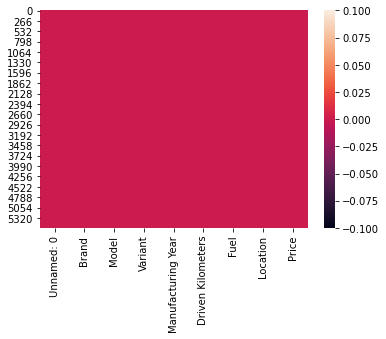

In [7]:
sns.heatmap(df.isnull())

There is no null value present in the dataset.

In [8]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Variant', 'Manufacturing Year',
       'Driven Kilometers', 'Fuel', 'Location', 'Price'],
      dtype='object')

In [9]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Mahindra', 'Renault', 'Volkswagen', 'Honda',
       'Tata', 'Audi', 'Volvo', 'BMW', 'Toyota', 'Ford', 'Datsun',
       'Mercedes', 'MG', 'KIA', 'Skoda', 'Jeep', 'Nissan', 'Chevrolet',
       'Mercedes-Benz', 'Kia', 'Land', 'Ambassador', 'Fiat', 'Isuzu',
       'Mini', 'Mitsubishi', 'Porsche', 'Jaguar'], dtype=object)

In [10]:
df['Model'].unique()

array(['Swift Dzire', 'Alto K10', 'Alto 800', 'Swift', 'Ritz', 'i 2 0',
       'TUV300', 'Baleno', 'Wagon R 1.0', 'Vitara Brezza', 'Kwid', 'Ciaz',
       'Verna', 'Polo', 'Amaze', 'Elite i20', 'Tiago', 'Q   3', 'S 6 0',
       'Creta', 'City', '3 Series', 'XUV500', 'Fortuner', 'X   3', 'AURA',
       'Tucson New', 'S Cross', 'Xcent', 'Ecosport', 'IGNIS', 'Ertiga',
       'New Figo', 'Redi Go', 'Glanza', 'Innova', 'Benz E Class', 'VENUE',
       'HECTOR', 'Dzire', 'GRAND I10 NIOS', 'Corolla Altis', 'Duster',
       'Figo Aspire', 'WR-V', 'Grand i10', 'Jazz', 'YARIS', '5 Series',
       'Etios Liva', 'S PRESSO', 'Alto', 'i 1 0', 'Celerio', 'Vento',
       'NEXON', 'i20 Active', 'Brio', 'Innova Crysta', 'SELTOS', 'X L 6',
       'New Wagon-R', 'Zen Estilo', 'Bolero', 'Rapid', 'C R V', 'Civic',
       'Hexa', 'Figo', 'Compass', 'FREESTYLE', 'BR-V', 'Superb', 'ALTROZ',
       'Ameo', 'Wagon R Stingray', 'Jetta', 'Santa Fe', 'S X 4',
       'NEW SANTRO', 'Eeco', 'Wagon R', 'E o n', 'TRIBER',

In [11]:
df['Manufacturing Year'].unique()

array([2013, 2016, 2018, 2015, 2014, 2017, 2012, 2020, 2019, 2011, 2021,
       2010, 2009, 2008, 2006, 2007, 2002, 1981, 2005, 2004, 1995, 1999,
       1998, 2003], dtype=int64)

In [12]:
df['Fuel'].unique()

array(['Diesel', 'Petrol', 'Petrol + CNG', 'Petrol + LPG', 'CNG', 'LPG'],
      dtype=object)

In [13]:
df['Location'].unique()

array(['New Delhi', 'Noida', 'Mumbai', 'Pune', 'Bengaluru', 'Hyderabad',
       'Chennai', 'Kolkata', 'Ahmedabad', 'Bangalore', 'Jaipur', 'Delhi'],
      dtype=object)

In [14]:
#Replacing the Model names
df['Model']=df['Model'].replace('i 2 0','i20').replace('Q   3','Q3').replace('S 6 0','S60').replace('X   3','X3').replace('i 1 0','i10').replace('X L 6','XL6').replace('C R V','CRV').replace('S X 4','SX4').replace('E o n','Eon').replace('A   3','A3').replace('E e c o','Eeco').replace('A u r a','Aura').replace('B e a t','Beat').replace('C i t y','City').replace('W R - V','WR-V').replace('E O N','Eon').replace('G   O','GO').replace('P o l o','Polo').replace('C i a z','Ciaz').replace('K W I D','KWIID').replace('F i g o','Figo').replace('X y l o','Xylo').replace('O m n i','Omni').replace('Q   5','Q5').replace('R i t z','Ritz').replace('A m e o','Ameo').replace('J a z z','Jazz').replace('A   4','A4').replace('B r i o','Brio').replace('A l t o','Alto').replace('J e e p','Jeep').replace('N a n o','Nano').replace('H e x a','Hexa').replace('M U - X','MU-X').replace('X   1','X1').replace('S   8 0','S 80').replace('V 4 0','V 40').replace('Z e s t','Zest').replace('B R - V','BR-V').replace('T h a r','Thar').replace('X   F','XF').replace('X   5','X5').replace('G L S','GLS').replace('C R - V','CR-V').replace('S a i l','Sail').replace('I k o n','Ikon').replace('8 0 0','800').replace('A   6','A6').replace('G e t z','Getz').replace('S u m o','Sumo').replace('Z e n','Zen').replace('C L A','CLA').replace('EON','Eon').replace('TUV300','TUV 300').replace('IGNIS','Ignis').replace('AURA','Aura').replace('SELTOS','Seltos').replace('S PRESSO','S-Presso').replace('XUV300','XUV 300').replace('KWID','Kwid').replace('KWIID','Kwid').replace('GRAND I10 NIOS','Grand i10 Nios').replace('FREESTYLE','Freestyle')

In [15]:
#Replacing Delhi as New Delhi,
df['Location']=df['Location'].replace('Delhi','New Delhi').replace('Bengaluru','Bangalore')

In [16]:
#Replacing Mercedes-Benz as Mercedes
df['Brand']=df['Brand'].replace('Mercedes-Benz','Mercedes').replace('KIA','Kia')

In [17]:
#Unnamed: 0 in unwanted column removing from df
df=df.drop('Unnamed: 0',axis=1)

In [18]:
df.loc[df['Model']=='[]']

,Brand,Model,Variant,Manufacturing Year,Driven Kilometers,Fuel,Location,Price
3257,Ambassador,[],Classic 2000 Dsz,1981,"50,000 kms",Diesel,Chennai,"1,05,000"
4217,Ambassador,[],CLASSIC 1500 DSL AC,1998,"84,000 kms",Diesel,Kolkata,"75,000"


In [19]:
df['Model']=df['Model'].replace('[]','')

In [20]:
df['Driven Kilometers']

0          74,644 km
1          32,669 km
2          29,031 km
3          89,196 km
4          43,382 km
            ...     
5570      72,000 kms
5571      68,000 kms
5572    1,28,000 kms
5573      80,000 kms
5574      50,000 kms
Name: Driven Kilometers, Length: 5575, dtype: object

In [21]:
#Removing ',' and 'kms' from the column Driven Kilometers
for i in range(len(df['Driven Kilometers'])):
    df['Driven Kilometers'][i]=df['Driven Kilometers'][i].split(' ')[0]
    if ',' in df['Driven Kilometers'][i]:
        df['Driven Kilometers'][i]=df['Driven Kilometers'][i].replace(',','')
df['Driven Kilometers']

0        74644
1        32669
2        29031
3        89196
4        43382
         ...  
5570     72000
5571     68000
5572    128000
5573     80000
5574     50000
Name: Driven Kilometers, Length: 5575, dtype: object

In [22]:
#Removing ',' from the Price column
for i in range(len(df['Price'])):
    if ',' in df['Price'][i]:
        df['Price'][i]=df['Price'][i].replace(',','')
df['Price']

0       401999
1       305199
2       295599
3       429099
4       344199
         ...  
5570    290000
5571    275000
5572    285000
5573    300000
5574    200000
Name: Price, Length: 5575, dtype: object

In [23]:
df

,Brand,Model,Variant,Manufacturing Year,Driven Kilometers,Fuel,Location,Price
0,Maruti,Swift Dzire,VDI BS IV,2013,74644,Diesel,New Delhi,401999
1,Maruti,Alto K10,LXI,2016,32669,Petrol,New Delhi,305199
2,Maruti,Alto 800,LXI,2018,29031,Petrol,New Delhi,295599
3,Maruti,Swift,VDI ABS,2015,89196,Diesel,New Delhi,429099
4,Maruti,Ritz,VDI,2014,43382,Diesel,New Delhi,344199
...,...,...,...,...,...,...,...,...
5570,Maruti,Swift Dzire,ZXi,2009,72000,Petrol,Pune,290000
5571,Honda,City,CVT,2008,68000,Petrol,Pune,275000
5572,Maruti,Alto K10,VXI,2014,128000,Petrol,Pune,285000
5573,Mahindra,Xylo,E4,2010,80000,Diesel,Pune,300000


In [24]:
#Driven kilometers and Price is object type changing to integer.
df['Driven Kilometers']=df['Driven Kilometers'].astype(int)
df['Price']=df['Price'].astype(int)
df.dtypes

Brand                 object
Model                 object
Variant               object
Manufacturing Year     int64
Driven Kilometers      int32
Fuel                  object
Location              object
Price                  int32
dtype: object

In [25]:
df.describe()

,Manufacturing Year,Driven Kilometers,Price
count,5575.000000,5575.000000,5.575000e+03
mean,2015.831211,51147.271570,5.992727e+05
std,2.835907,34991.910671,4.849302e+05
min,1981.000000,58.000000,2.800000e+04
25%,2014.000000,25000.000000,3.638990e+05
50%,2016.000000,44122.000000,4.998990e+05
75%,2018.000000,70124.000000,6.850000e+05
max,2021.000000,308000.000000,8.200000e+06


In [26]:
df.corr()

,Manufacturing Year,Driven Kilometers,Price
Manufacturing Year,1.000000,-0.472774,0.320935
Driven Kilometers,-0.472774,1.000000,-0.097061
Price,0.320935,-0.097061,1.000000


<AxesSubplot:>

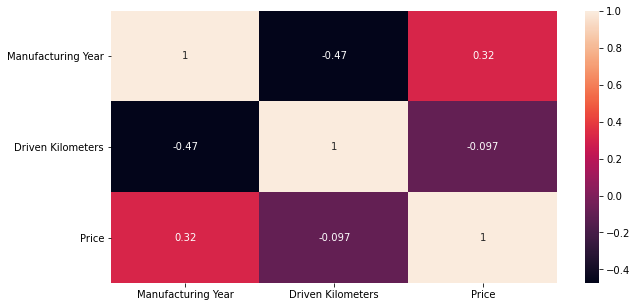

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Driven Kilometers', ylabel='Density'>

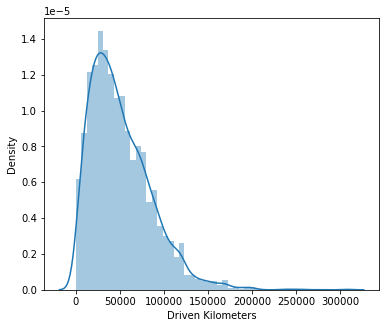

In [28]:
plt.figure(figsize=(6,5))
sns.distplot(df['Driven Kilometers'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

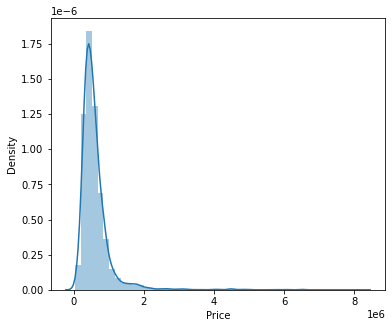

In [29]:
plt.figure(figsize=(6,5))
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Manufacturing Year', ylabel='Density'>

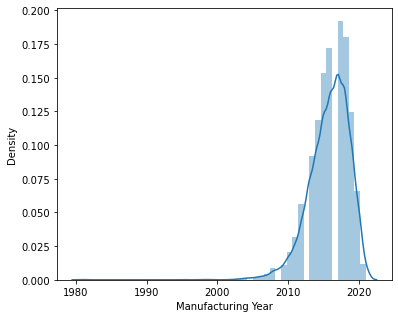

In [30]:
plt.figure(figsize=(6,5))
sns.distplot(df['Manufacturing Year'])

In [31]:
df.skew()

Manufacturing Year   -1.235435
Driven Kilometers     1.259456
Price                 5.917946
dtype: float64

Small skewness is present in the price

<AxesSubplot:xlabel='Driven Kilometers'>

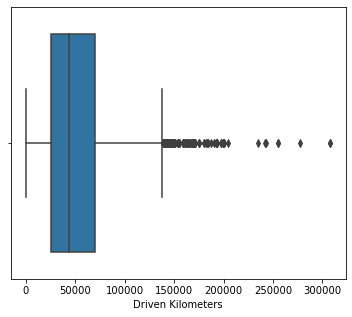

In [32]:
plt.figure(figsize=(6,5))
sns.boxplot(df['Driven Kilometers'])

<AxesSubplot:xlabel='Manufacturing Year'>

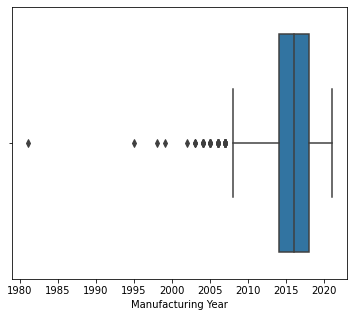

In [33]:
plt.figure(figsize=(6,5))
sns.boxplot(df['Manufacturing Year'])

<AxesSubplot:xlabel='Price'>

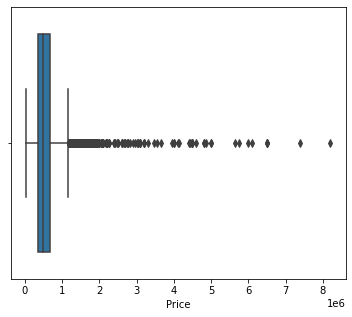

In [34]:
plt.figure(figsize=(6,5))
sns.boxplot(df['Price'])

Outliers are present in Driven Kilometers,Manufacturing Year and Price.

Maruti        2441
Hyundai       1274
Honda          418
Ford           272
Renault        237
Toyota         175
Volkswagen     160
Mahindra       156
Tata           127
Datsun          46
Skoda           36
Nissan          33
BMW             32
Mercedes        26
Chevrolet       26
Jeep            22
Audi            20
Kia             20
MG              19
Volvo            9
Land             6
Mitsubishi       6
Fiat             5
Porsche          4
Ambassador       2
Mini             1
Jaguar           1
Isuzu            1
Name: Brand, dtype: int64

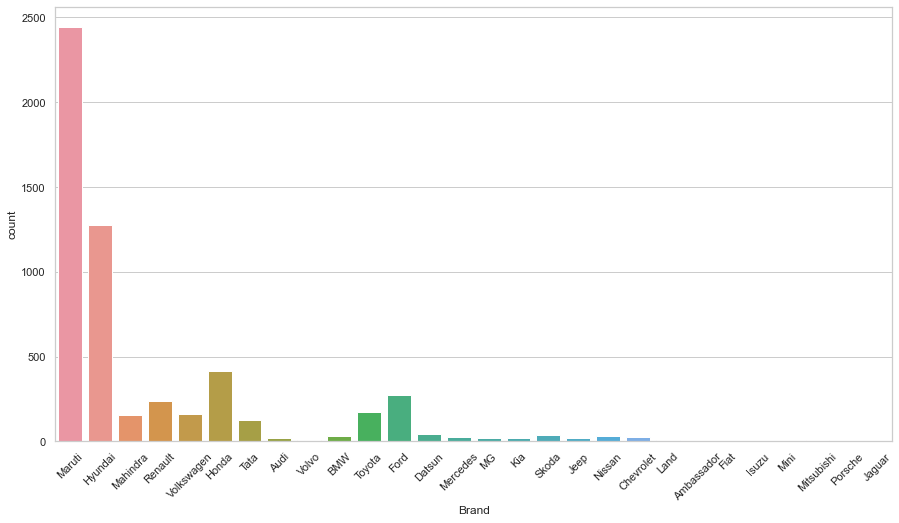

In [35]:
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.countplot(df['Brand'])
plt.xticks(rotation=45)
df['Brand'].value_counts()

In the dataset large amount of vehicle are from the brands Maruti,Hyundai and Honda. Less amount of vehicles from the brands Isuzu,Jaguar,Mini and Porsche.

Petrol          3705
Diesel          1824
CNG               32
Petrol + CNG       9
LPG                4
Petrol + LPG       1
Name: Fuel, dtype: int64

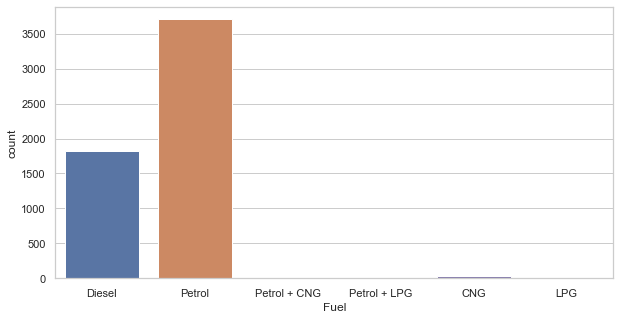

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df['Fuel'])
df['Fuel'].value_counts()

In the dataset 3705 vehicle use Petrol,1824 vehicle use Diesel,32 vehicle use CNG, 9 vehicle use petrol+CNG and 4 vehicle use LPG.

Chennai      840
Noida        680
Ahmedabad    680
Mumbai       680
Kolkata      576
Pune         520
Bangalore    500
New Delhi    460
Hyderabad    379
Jaipur       260
Name: Location, dtype: int64

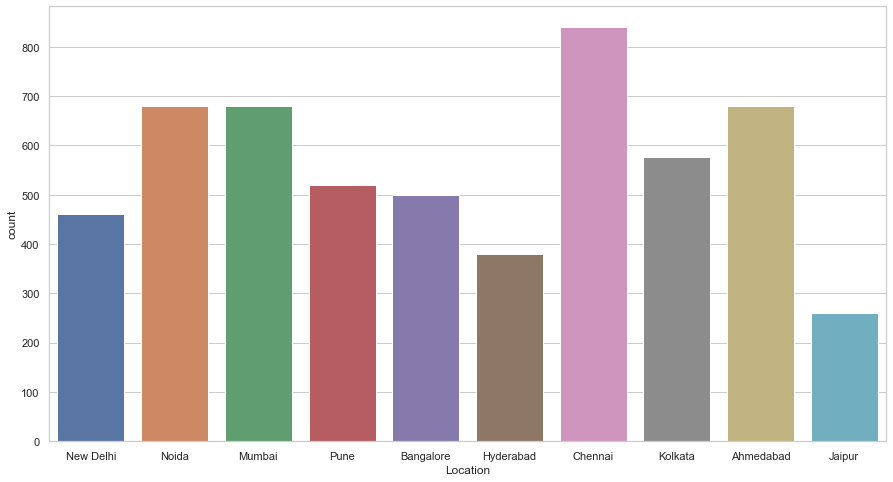

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(df['Location'])
df['Location'].value_counts()

<AxesSubplot:xlabel='Location', ylabel='Price'>

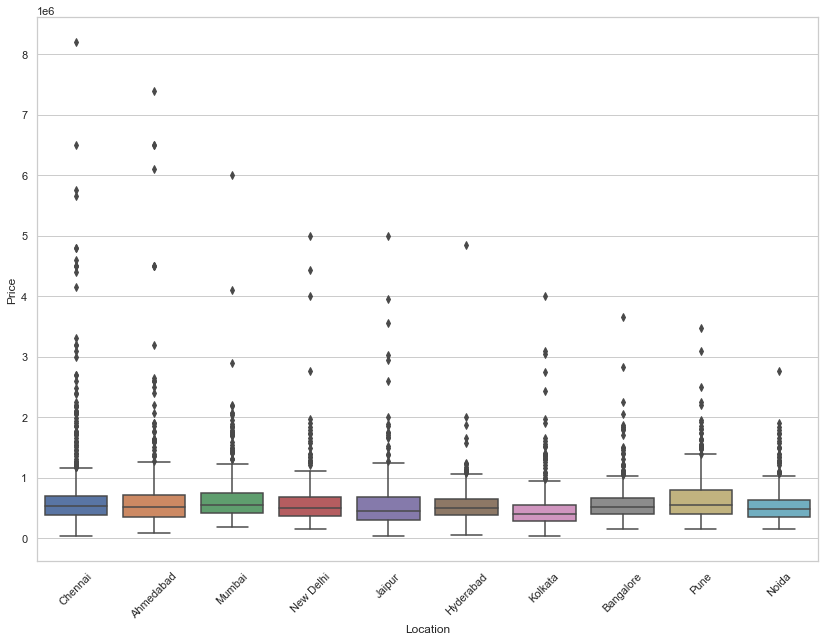

In [38]:
plt.figure(figsize=(14,10))
plt.xticks(rotation='45')
sns.boxplot(x='Location',y='Price',data=df.sort_values('Price',ascending=False))

The price is almost similar in all locations

<AxesSubplot:xlabel='Brand', ylabel='Price'>

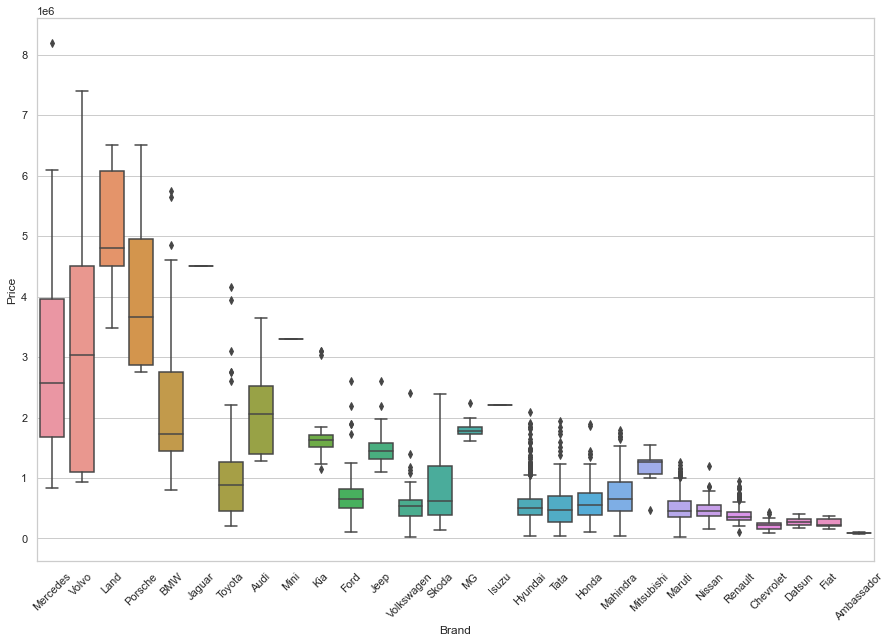

In [39]:
plt.figure(figsize=(15,10))
plt.xticks(rotation='45')
sns.boxplot(x='Brand',y='Price',data=df.sort_values('Price',ascending=False))

The price range of brands Mercedes,Volvo and BMW is between 1 and 8.
Porsche price ranging from 2.8 to 6.5.
The price range of brands Ford,Jeep,Skoda,Hyundai,Tata,Honda,Mahindra and Maruti is under 2.
The price range of Nissan,Renault,Chevrolet,Datsun and Fiat is between 0 and 1.

<AxesSubplot:xlabel='Driven Kilometers', ylabel='Price'>

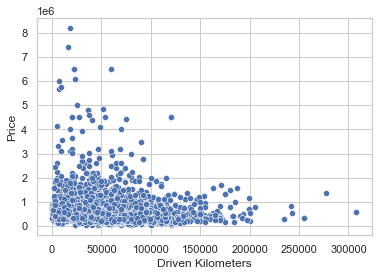

In [40]:
sns.scatterplot('Driven Kilometers','Price',data=df)

<AxesSubplot:xlabel='Manufacturing Year', ylabel='Price'>

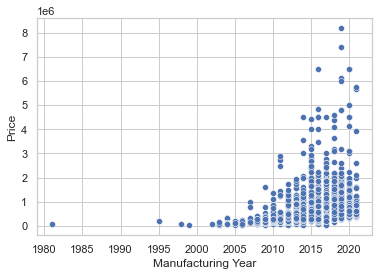

In [41]:
sns.scatterplot('Manufacturing Year','Price',data=df)

<AxesSubplot:xlabel='Driven Kilometers', ylabel='Price'>

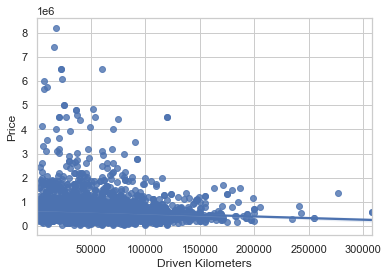

In [42]:
sns.regplot('Driven Kilometers','Price',data=df)

Weak linear relation between Price and Driven kilometers.

<AxesSubplot:xlabel='Manufacturing Year', ylabel='Price'>

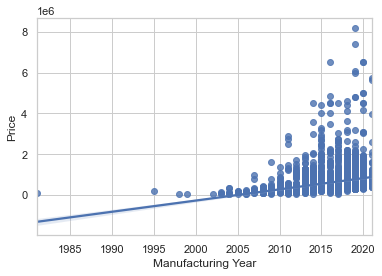

In [43]:
sns.regplot('Manufacturing Year','Price',data=df)

Positive linear relation between price and Manufacturing year.

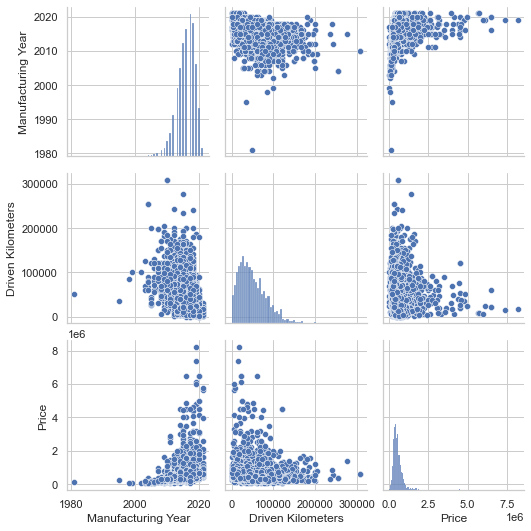

In [44]:
sns.pairplot(df)

In [45]:
#Encoding the categorical columns
Le=LabelEncoder()
for i in df:
    if df[i].dtypes=='object':
        df[i]=Le.fit_transform(df[i])

In [46]:
df.head()

,Brand,Model,Variant,Manufacturing Year,Driven Kilometers,Fuel,Location,Price
0,16,163,1094,2013,74644,1,7,401999
1,16,18,803,2016,32669,3,7,305199
2,16,17,803,2018,29031,3,7,295599
3,16,162,1092,2015,89196,1,7,429099
4,16,133,1090,2014,43382,1,7,344199


<AxesSubplot:>

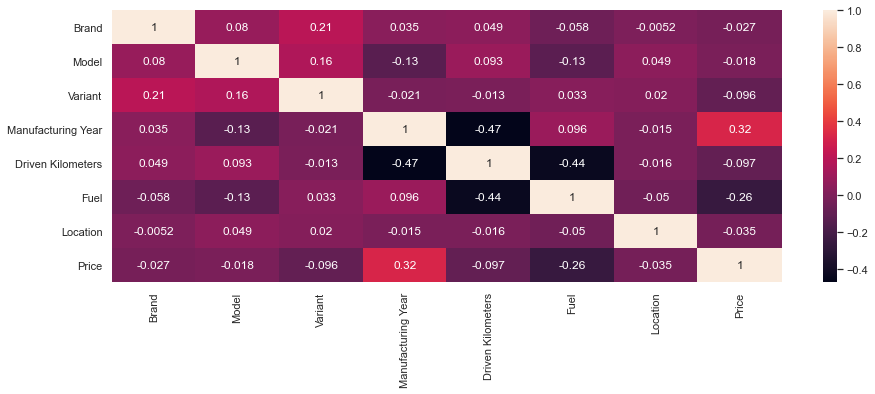

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

The output variable Price is positively correlated to Manufacturing year and negatively correlated to Brand,Model,Variant,Driven kilometers,Fuel and Location.

In [48]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  43,   44,   45,   57,   76,   90,   95,  163,  293,  364,  365,
        366,  378,  397,  411,  416,  484,  614,  654,  720,  818,  824,
        911,  912,  957,  987,  991,  994, 1196, 1224, 1243, 1305, 1532,
       1598, 1609, 1629, 1715, 1717, 1799, 1841, 1903, 1916, 2378, 2437,
       2692, 2711, 2749, 2822, 2827, 2834, 2842, 2847, 2854, 2863, 2877,
       2890, 2892, 2897, 2910, 2912, 2932, 2934, 2952, 2954, 2966, 2968,
       3009, 3010, 3019, 3022, 3026, 3027, 3029, 3030, 3031, 3041, 3050,
       3052, 3241, 3250, 3257, 3264, 3280, 3281, 3281, 3283, 3284, 3296,
       3298, 3299, 3299, 3302, 3308, 3311, 3311, 3316, 3318, 3319, 3319,
       3322, 3328, 3331, 3331, 3339, 3343, 3346, 3367, 3369, 3378, 3390,
       3391, 3418, 3452, 3466, 3477, 3478, 3479, 3480, 3481, 3482, 3484,
       3510, 3519, 3541, 3543, 3548, 3583, 3606, 3612, 3613, 3617, 3621,
       3655, 3667, 3668, 3671, 3887, 3888, 3892, 3899, 3916, 3934, 3935,
       3943, 3944, 3945, 3969, 3973, 3997, 4055, 4

In [49]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (5381, 8)


In [50]:
dataloss=((5575-5381)/5575)*100
dataloss

3.4798206278026904

3.47% Dataloss after outlier removal

In [51]:
# Separating dependent and independent variables

X=df.drop('Price',axis=1)
Y=df['Price']
print(X.shape)
print(Y.shape)

(5381, 7)
(5381,)


In [52]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[ 0.40092583,  0.94411434,  0.79881319, ...,  0.79960485,
        -1.43452751,  0.85268646],
       [ 0.40092583, -1.26378912,  0.04484824, ..., -0.52822652,
         0.67858295,  0.85268646],
       [ 0.40092583, -1.27901604,  0.04484824, ..., -0.64331052,
         0.67858295,  0.85268646],
       ...,
       [ 0.40092583, -1.26378912,  0.90245098, ...,  2.4874612 ,
         0.67858295,  1.52329533],
       [ 0.2262956 ,  1.47705655, -0.29456553, ...,  0.96903581,
        -1.43452751,  1.52329533],
       [-1.69463698,  0.47207981,  0.32985217, ...,  0.02001994,
         0.67858295,  1.52329533]])

In [53]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error


ls=Lasso()
rd=Ridge()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
#Lasso
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.3112585697776311

In [55]:
predls=ls.predict(x_test)
print('R2 score :',r2_score(y_test,predls))
print('Mean squared error :',mean_squared_error(y_test,predls))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predls)))

R2 score : 0.3049736426609213
Mean squared error : 58690182462.56208
Root Mean squared error  : 242260.56728770796


In [56]:
#Ridge
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.31125855863934093

In [57]:
predrd=rd.predict(x_test)
print('R2 score :',r2_score(y_test,predrd))
print('Mean squared error :',mean_squared_error(y_test,predrd))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrd)))

R2 score : 0.30497500308052805
Mean squared error : 58690067584.50875
Root Mean squared error  : 242260.33019152918


In [58]:
#Decision tree
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9999984623133558

In [59]:
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.7731081254976244
Mean squared error : 19159453987.90193
Root Mean squared error  : 138417.67946292818


In [60]:
#Random forest
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9816652566614482

In [61]:
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.8634958972171964
Mean squared error : 11526830046.968372
Root Mean squared error  : 107363.07580806527


In [62]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.812051652347291

In [63]:
predgb=gb.predict(x_test)
print('R2 score :',r2_score(y_test,predgb))
print('Mean squared error :',mean_squared_error(y_test,predgb))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb)))

R2 score : 0.7578397402039585
Mean squared error : 20448763823.89822
Root Mean squared error  : 142999.17420704995


Hyperparameter Tuning

In [64]:
#DTR
grid_para={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
           'splitter':['best','random'],'max_depth':range(1,20,2),
           'min_samples_split':range(2,20,1),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dt,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [65]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'friedman_mse', 'max_depth': 19, 'max_features': 'auto', 'min_samples_split': 13, 'splitter': 'best'}


In [66]:
dt=DecisionTreeRegressor(criterion='friedman_mse',
                         max_depth=19,max_features='auto',
                         min_samples_split=13,splitter='best')
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('R2 score :',r2_score(y_test,preddt))
print('Mean squared error :',mean_squared_error(y_test,preddt))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,preddt)))

R2 score : 0.785086739674205
Mean squared error : 18147942634.053852
Root Mean squared error  : 134714.3000354968


Text(0, 0.5, 'Predicted data')

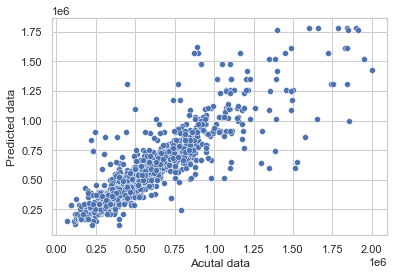

In [67]:
sns.scatterplot(x=y_test,y=preddt)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [68]:
#Random Forest
grid_para={'criterion':['squared_error','absolute_error','poisson'],'min_samples_split':[1,3,4,6],
           'min_samples_leaf':[1,3,5,6],'max_depth':range(2,20,2),'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rf,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 6],
                         'min_samples_split': [1, 3, 4, 6]})

In [69]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'poisson', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3}


In [70]:
rf=RandomForestRegressor(criterion='poisson',max_depth=18,
                         max_features='sqrt',min_samples_leaf=3,min_samples_split=3)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2 score :',r2_score(y_test,predrf))
print('Mean squared error :',mean_squared_error(y_test,predrf))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predrf)))

R2 score : 0.5971124419844092
Mean squared error : 34021075664.46616
Root Mean squared error  : 184448.0297115319


Text(0, 0.5, 'Predicted data')

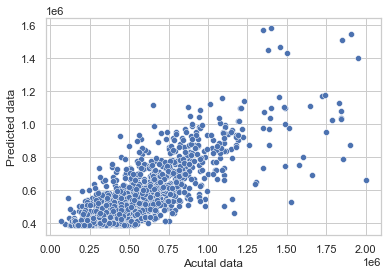

In [71]:
sns.scatterplot(x=y_test,y=predrf)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

In [72]:
#GradientBoost
grid_para={'criterion':['squared_error','friedman_mse','mse','mae'],
           'loss':['squared_error','absolute_error','huber','quantile'],
           'learning_rate':[0.001,0.01,0.1,1.0,1.5],
           'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse', 'mse',
                                       'mae'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'log2', 'sqrt']})

In [73]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'mse', 'learning_rate': 1.0, 'loss': 'huber', 'max_features': 'auto'}


In [74]:
gb=GradientBoostingRegressor(criterion='mse',
                             learning_rate=1.0,loss='huber',max_features='auto')
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('R2 score :',r2_score(y_test,predgb))
print('Mean squared error :',mean_squared_error(y_test,predgb))
print('Root Mean squared error  :',np.sqrt(mean_squared_error(y_test,predgb)))

R2 score : 0.8235250855330072
Mean squared error : 14902089425.480396
Root Mean squared error  : 122074.11447755988


Text(0, 0.5, 'Predicted data')

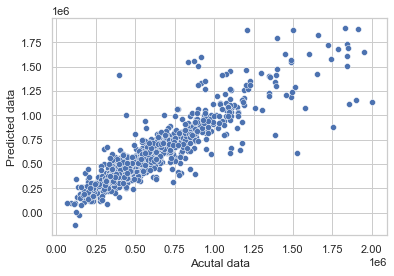

In [75]:
sns.scatterplot(x=y_test,y=predgb)
plt.xlabel('Acutal data')
plt.ylabel('Predicted data')

Cross validation

In [76]:
#Decision tree
score=cross_val_score(dt,X,Y,cv=3)
print(score)
print(score.mean())

[0.73588095 0.63480303 0.61062033]
0.6604347711718985


In [77]:
#Random Forest
score=cross_val_score(rf,X,Y,cv=3)
print(score)
print(score.mean())

[0.4781814  0.4186783  0.40556236]
0.43414068490767904


In [78]:
#GradientBoosting
score=cross_val_score(gb,X,Y,cv=3)
print(score)
print(score.mean())

[0.8043116  0.70580366 0.66182555]
0.723980271911608


The Gradient Boosting Regressor model R2 score is 82.35% and cross validation socre is 72.39%.

Gradient Boosting Regressor gives the best result compared to other models.

In [79]:
import pickle
filename="Used Car Price.pkl"
pickle.dump(gb,open(filename, 'wb'))

Conclusion

In [80]:
model=pickle.load(open("Used Car Price.pkl",'rb'))
result=model.score(x_test,y_test)
print('The R2 score of the model : ',result*100)

The R2 score of the model :  82.35250855330072


In [81]:
Accuracy=pd.DataFrame([model.predict(x_test),predgb],index=['Predicted','Original'])
Accuracy

,0,1,2,3,4,5,6,7,8,9,...,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345
Predicted,462839.943589,328245.37551,259863.139292,892958.189153,431474.267055,308096.480558,422075.757006,332590.077432,658397.431505,694962.192883,...,1.596859e+06,501048.105384,750753.501338,799998.144229,370754.871505,336367.341128,691277.124126,326840.983393,373063.030027,695738.014941
Original,462839.943589,328245.37551,259863.139292,892958.189153,431474.267055,308096.480558,422075.757006,332590.077432,658397.431505,694962.192883,...,1.596859e+06,501048.105384,750753.501338,799998.144229,370754.871505,336367.341128,691277.124126,326840.983393,373063.030027,695738.014941
